In [1]:
import pandas as pd

In [2]:
imoveis = pd.read_csv('aluguel/aluguel_residencial.csv', sep=';')

In [3]:
imoveis.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [4]:
grupo_bairro = imoveis.groupby('Bairro')

# Estatísticas Descritivas

In [5]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [9]:
grupo_bairro['Valor'].aggregate(['mean', 'min', 'max']).rename(columns={'mean': 'media', 'min': 'minimo', 'max':'maximo'}).round(2)

,media,minimo,maximo
Bairro,,,
Abolição,1195.33,800.0,2300.0
Alto da Boa Vista,3966.67,600.0,15000.0
Anchieta,875.00,700.0,1000.0
Andaraí,1464.71,700.0,2950.0
Anil,2048.87,300.0,7000.0
...,...,...,...
Vila Valqueire,1769.58,800.0,16000.0
Vila da Penha,1260.58,450.0,4500.0
Vista Alegre,1114.38,700.0,1400.0


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

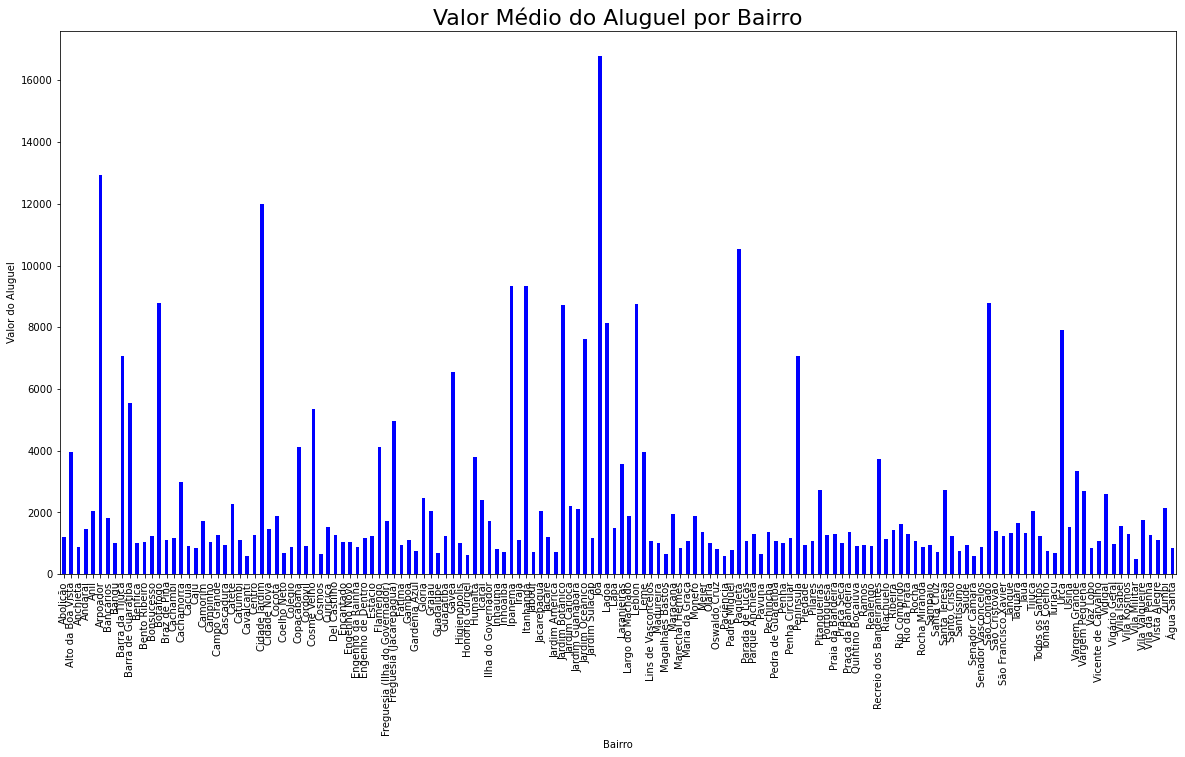

In [12]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})

#### Obs: Existem outliers que dificultam a compreensão de um comportamento "padrão" dos dados no geral

## Faixas de Valor

In [13]:
#Segregar faixas por número de quartos:
# 1 e 2
# 3 e 4
# 5 e 6
# 7 ou mais
classes = [0, 2, 4, 6, 100]

In [14]:
quartos = pd.cut(imoveis.Quartos, classes)
quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (0.0, 2.0]
            ...    
21821    (0.0, 2.0]
21822           NaN
21823    (2.0, 4.0]
21824    (0.0, 2.0]
21825    (0.0, 2.0]
Name: Quartos, Length: 21826, dtype: category
Categories (4, interval[int64, right]): [(0, 2] < (2, 4] < (4, 6] < (6, 100]]

In [15]:
pd.value_counts(quartos)

(0, 2]      11250
(2, 4]       9681
(4, 6]        686
(6, 100]       50
Name: Quartos, dtype: int64

In [37]:
labels = ['0 a 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 quartos ou mais']

In [38]:
quartos = pd.cut(x=imoveis.Quartos, bins=classes, labels=labels, include_lowest=True)

In [39]:
pd.value_counts(quartos)

0 a 2 quartos        11409
3 e 4 quartos         9681
5 e 6 quartos          686
7 quartos ou mais       50
Name: Quartos, dtype: int64

# Removendo Outliers

<img src="boxplot_explicacao.png">

<AxesSubplot:>

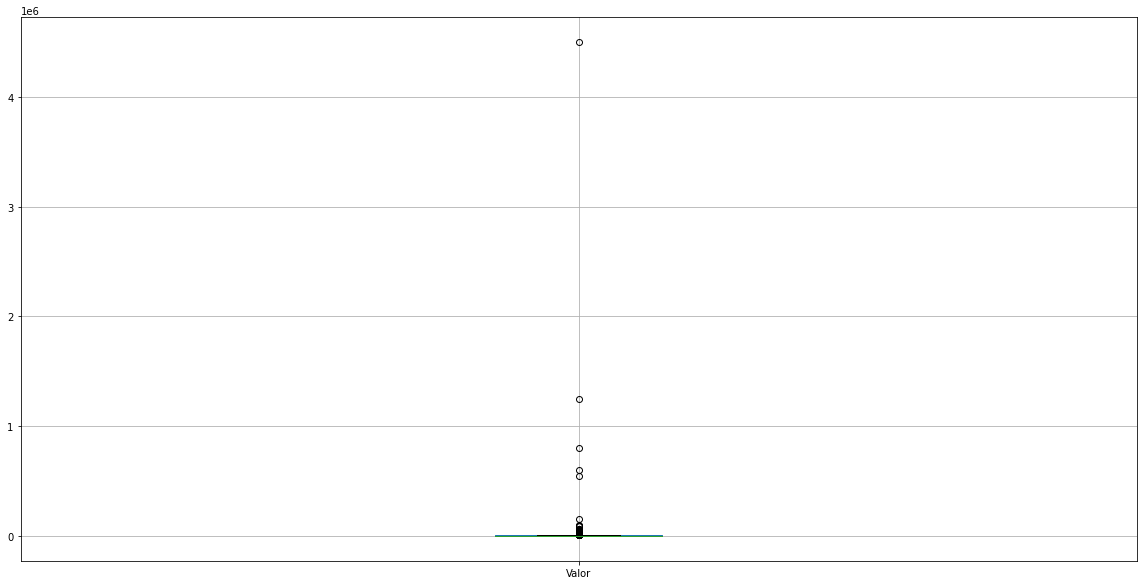

In [50]:
imoveis.boxplot(['Valor'])

In [51]:
imoveis[imoveis['Valor']>55000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
121,Apartamento,Ipanema,4,6,1,700,65000.0,8860.0,5699.0,92.86,Apartamento
1220,Casa de Condomínio,Barra da Tijuca,5,8,5,1150,60000.0,2000.0,1700.0,52.17,Casa
2251,Apartamento,Ipanema,4,6,4,700,65000.0,8860.0,599.0,92.86,Apartamento
4863,Apartamento,Ipanema,5,3,4,806,90000.0,9170.0,6000.0,111.66,Apartamento
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
9838,Apartamento,Ipanema,5,3,4,800,90000.0,9188.0,60230.0,112.50,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


#### Notam-se imóveis acima de 500 mil de aluguel que distorcem os dados centrais e dificultam o entendimento dos dados

In [46]:
valor = imoveis['Valor']

In [47]:
Q1 = valor.quantile(0.25)
Q1

1600.0

In [48]:
Q2 = valor.quantile(0.5)
Q2

2700.0

In [49]:
Q3 = valor.quantile(0.75)
Q3

5500.0

In [52]:
#intervalo interquartílico
IIQ = Q3 - Q1

In [53]:
limite_inferior = Q1 - 1.5 * IIQ

In [54]:
limite_superior = Q3 + 1.5 * IIQ

In [55]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

In [56]:
imoveis_ajustados = imoveis[selecao]

<AxesSubplot:>

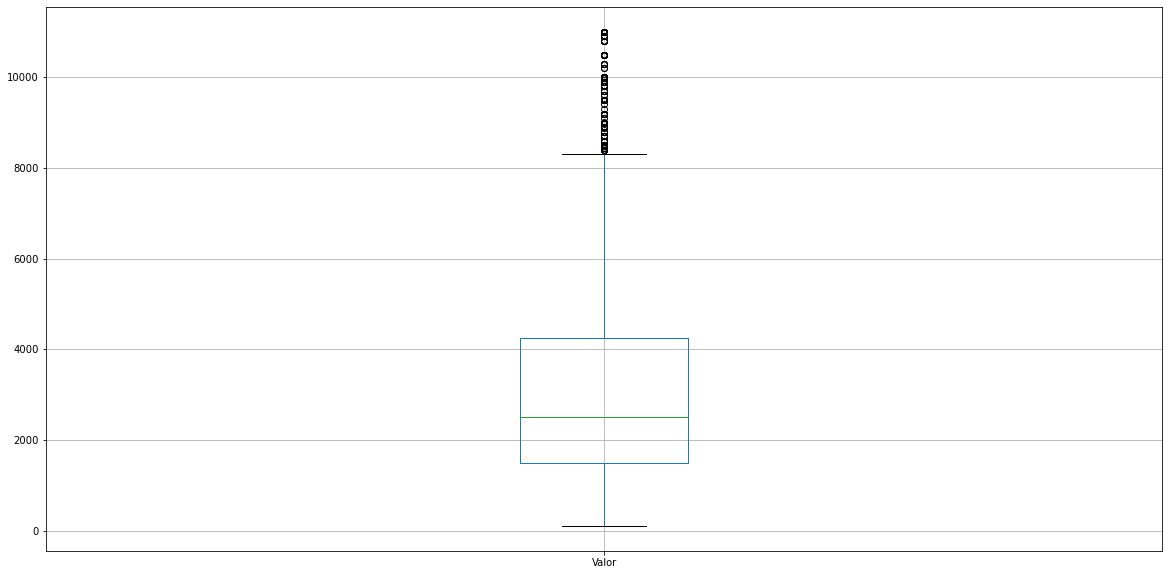

In [57]:
imoveis_ajustados.boxplot(['Valor'])

## Histograma

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

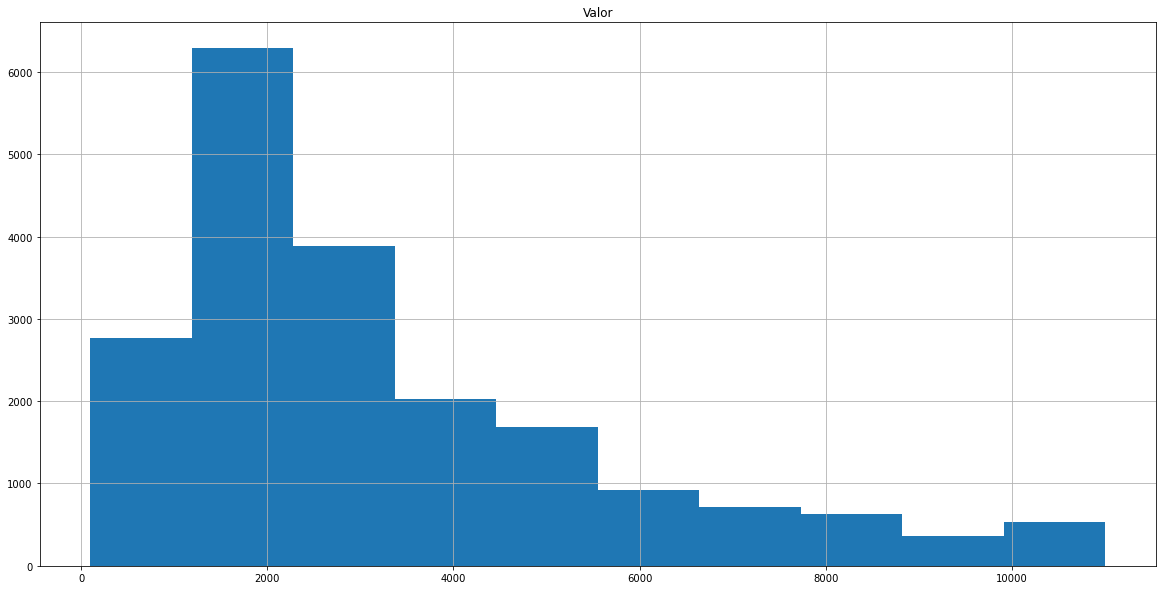

In [58]:
imoveis_ajustados.hist(['Valor'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

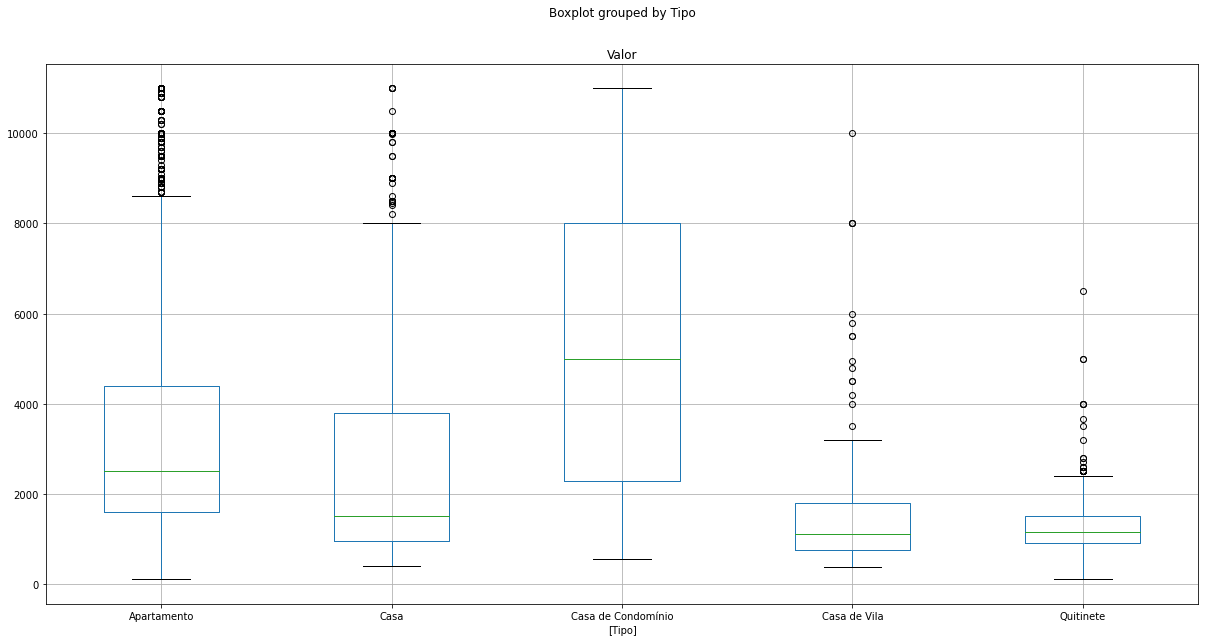

In [59]:
imoveis_ajustados.boxplot(['Valor'], by = ['Tipo'])

#### Teremos um box-plot pautado por tipo de imóvel, porém, como foram tratados igualmente anteriormente, podemos ter informações discrepantes em um tipo que não estão em outro, e isso pode atrapalhar nossa análise

## Segregando por tipo de imóvel

In [61]:
grupo_tipo = imoveis.groupby('Tipo')['Valor']

In [62]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [63]:
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [64]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [65]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [66]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [67]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [68]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [70]:
limite_superior['Apartamento']

9950.0

In [71]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    is_tipo = imoveis['Tipo'] == tipo
    is_dentro_limite = (imoveis['Valor'] >= limite_inferior[tipo]) & (imoveis['Valor'] <= limite_superior[tipo])
    selecao = is_tipo & is_dentro_limite
    dados_selecao = imoveis[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

In [72]:
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21687,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
21728,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
21748,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
21815,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

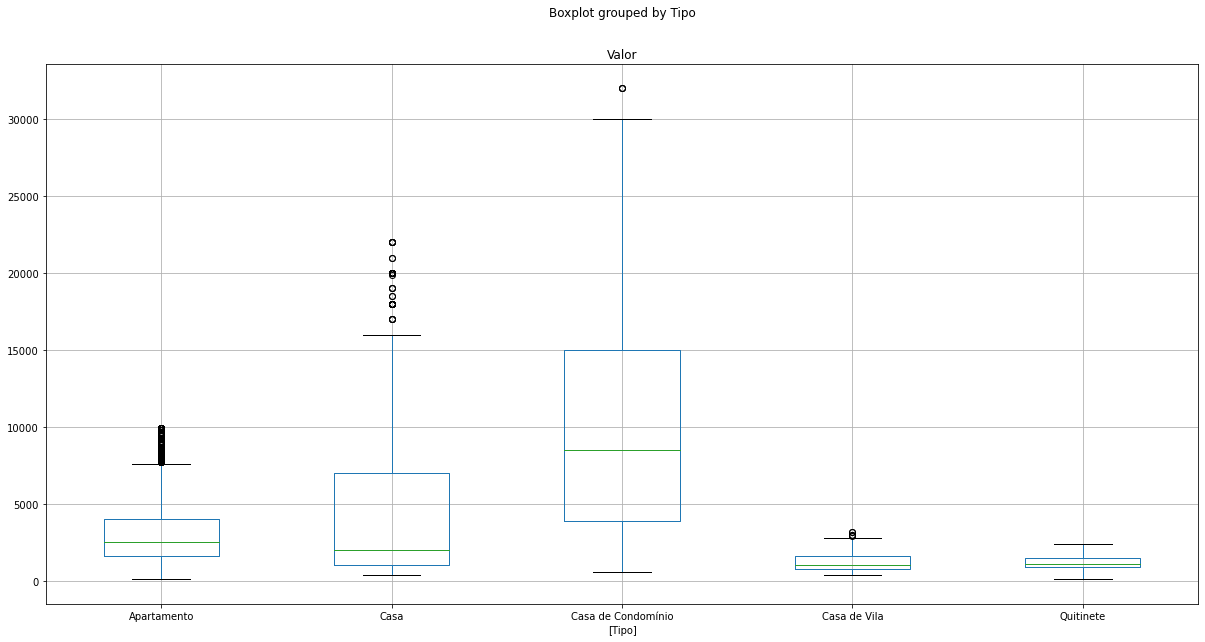

In [73]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [74]:
dados_new.to_csv('aluguel/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)